# CIFAR-100

The code below will be the training process with convolutional neural networks(a.k.a CNN) of the cifar-100 dataset.

The augmentation codes for images and configuration files are in './cifar100/' folder.

## Step 1. CIFAR-100 Data Loading Processing

Below will be the simple code of loading the cifar-100 data batches into python array formats.

Each images and labels will be stored in 'train_images', 'train_labels'.

In [1]:
import os
os.chdir('../cifar100/') # change the current os directory for importation.

import batch_load as datasets
import test as tst
import config as cf
from network import *
import network
os.chdir('../notebook/') # change the directory back to the current notebook.

## Step 1-1. Upload Confirmation

The given images should be (32x32) in RGB format, and the training batch should contain 50000 examples.

Each example will have a lable corresponding to which class it is in.

There are 100 classes under 20 superclasses.

In [2]:
def named_classifier(label):
    """
    Claasifying encoded labels into string names.

    @ Return : string label

    """
    str_array=[
        'beaver', 'dolphin', 'otter', 'seal', 'whale',
        'aquarium fish', 'flatfish', 'ray', 'shark', 'trout',
        'orchids', 'poppies', 'roses', 'sunflowers', 'tulips',
        'bottles', 'bowls', 'cans', 'cups', 'plates',
        'apples', 'mushrooms', 'oranges', 'pears', 'sweet peppers',
        'clock', 'computer keyboard', 'lamp', 'telephone', 'television',
        'bed', 'chair', 'couch', 'table', 'wardrobe',
        'bee', 'beetle', 'butterfly', 'caterpillar', 'cockroach',
        'bear', 'leopard', 'lion', 'tiger', 'wolf',
        'bridge', 'castle', 'house', 'road', 'skyscraper',
        'cloud', 'forest', 'mountain', 'plain', 'sea',
        'camel', 'cattle', 'chimpanzee', 'elephant', 'kangaroo',
        'fox', 'porcupine', 'possum', 'raccoon', 'skunk',
        'crab', 'lobster', 'snail', 'spider', 'worm',
        'baby', 'boy', 'girl', 'man', 'woman',
        'crocodile', 'dinosaur', 'lizard', 'snake', 'turtle',
        'hamster', 'mouse', 'rabbit', 'shrew', 'squirrel',
        'maple', 'oak', 'palm', 'pine', 'willow',
        'bicycle', 'bus', 'motorcycle', 'pickup truck', 'train',
        'lawn-mower', 'rocket', 'streetcar', 'tank', 'tractor'
    ]
    
    str_array = sorted(str_array)

    return str_array[label]

In [3]:
train_images, train_labels = datasets.load_cifar100(is_train=True)
print train_images.shape, train_labels.shape

(50000, 32, 32, 3) (50000,)


## Step 1-2. Plotting Uploaded Images

To confirm that the images were uploaded correctly, we will randomly plot out a subset of the training batch.

We will first import the basic dependencies, then will randomly print out 25 images and its labels.

In [4]:
import random
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [5]:
def implot_RGB(img, normalize=True):
    """
    Tiny helper to show images as uint8 and remove axis labels.

    @ Return : Image plot

    """
    if normalize:
        img_max, img_min = np.max(img), np.min(img)
        img = 255.0 * (img - img_min) / (img_max - img_min)
    plt.imshow(img.astype('uint8'))
    plt.gca().axis('off')

In [7]:
str_array=[
        'beaver', 'dolphin', 'otter', 'seal', 'whale',
        'aquarium fish', 'flatfish', 'ray', 'shark', 'trout',
        'orchids', 'poppies', 'roses', 'sunflowers', 'tulips',
        'bottles', 'bowls', 'cans', 'cups', 'plates',
        'apples', 'mushrooms', 'oranges', 'pears', 'sweet peppers',
        'clock', 'computer keyboard', 'lamp', 'telephone', 'television',
        'bed', 'chair', 'couch', 'table', 'wardrobe',
        'bee', 'beetle', 'butterfly', 'caterpillar', 'cockroach',
        'bear', 'leopard', 'lion', 'tiger', 'wolf',
        'bridge', 'castle', 'house', 'road', 'skyscraper',
        'cloud', 'forest', 'mountain', 'plain', 'sea',
        'camel', 'cattle', 'chimpanzee', 'elephant', 'kangaroo',
        'fox', 'porcupine', 'possum', 'raccoon', 'skunk',
        'crab', 'lobster', 'snail', 'spider', 'worm',
        'baby', 'boy', 'girl', 'man', 'woman',
        'crocodile', 'dinosaur', 'lizard', 'snake', 'turtle',
        'hamster', 'mouse', 'rabbit', 'shrew', 'squirrel',
        'maple', 'oak', 'palm', 'pine', 'willow',
        'bicycle', 'bus', 'motorcycle', 'pickup truck', 'train',
        'lawn-mower', 'rocket', 'streetcar', 'tank', 'tractor'
    ]
    
print sorted(str_array)

['apples', 'aquarium fish', 'baby', 'bear', 'beaver', 'bed', 'bee', 'beetle', 'bicycle', 'bottles', 'bowls', 'boy', 'bridge', 'bus', 'butterfly', 'camel', 'cans', 'castle', 'caterpillar', 'cattle', 'chair', 'chimpanzee', 'clock', 'cloud', 'cockroach', 'computer keyboard', 'couch', 'crab', 'crocodile', 'cups', 'dinosaur', 'dolphin', 'elephant', 'flatfish', 'forest', 'fox', 'girl', 'hamster', 'house', 'kangaroo', 'lamp', 'lawn-mower', 'leopard', 'lion', 'lizard', 'lobster', 'man', 'maple', 'motorcycle', 'mountain', 'mouse', 'mushrooms', 'oak', 'oranges', 'orchids', 'otter', 'palm', 'pears', 'pickup truck', 'pine', 'plain', 'plates', 'poppies', 'porcupine', 'possum', 'rabbit', 'raccoon', 'ray', 'road', 'rocket', 'roses', 'sea', 'seal', 'shark', 'shrew', 'skunk', 'skyscraper', 'snail', 'snake', 'spider', 'squirrel', 'streetcar', 'sunflowers', 'sweet peppers', 'table', 'tank', 'telephone', 'television', 'tiger', 'tractor', 'train', 'trout', 'tulips', 'turtle', 'wardrobe', 'whale', 'willow',

Actual Label Examples : 


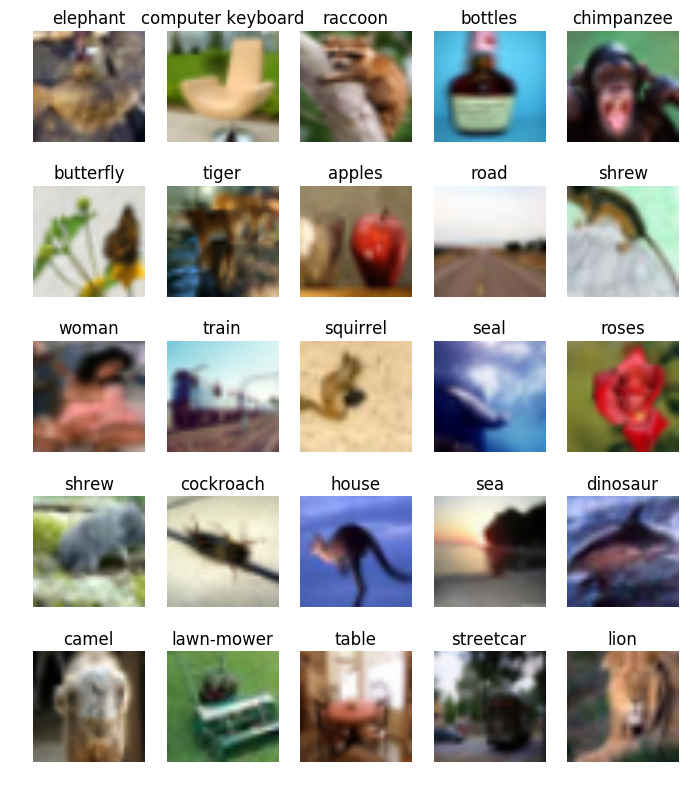

In [6]:
print('Actual Label Examples : ')
for i in range(25) :
    r = random.randint(0, len(train_labels))
    plt.subplot(5, 5, i+1)
    plt.subplots_adjust(top = 2.0, right=1.2)
    implot_RGB(train_images[r])
    plt.title(named_classifier(train_labels[r]))